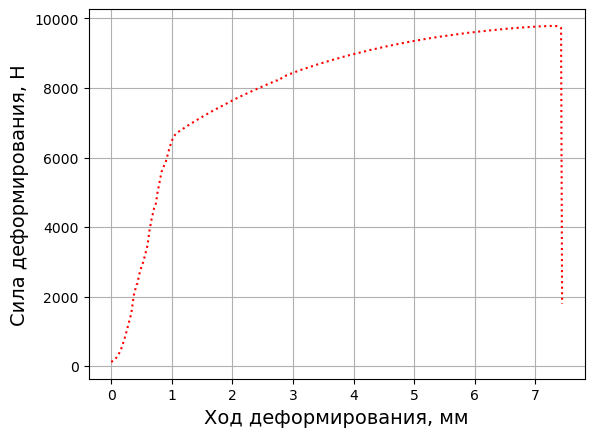

In [2]:
import numpy as np
import matplotlib.pyplot as plt

d0 = 5/2
L0 = 50

#столбец 0 - ход деформирования
#столбец 1 - сила деформирования
#[x, y] - x - строка, y - столбец

# Преобразование файла с заменой запятых на точки
#input_file = 'C:/Jupiter/HM1_info/load_test_Log1.txt'
#output_file = 'C:/Jupiter/HM1_info/load_test_Log1_converted.txt'

#with open(input_file, 'r', encoding='utf-8') as f_in:
   # with open(output_file, 'w', encoding='utf-8') as f_out:
       # for line in f_in:
            # Заменяем запятые на точки и записываем в новый файл
            #converted_line = line.replace(',', '.')
           # f_out.write(converted_line))

#print(f"Файл преобразован и сохранен как: {output_file}")
load_stroke_array = np.loadtxt('load_test_Log1_converted.txt',     delimiter='\t',)
#Построение кривой деформации
plt.figure(1)
plt.plot (load_stroke_array[:, 1], load_stroke_array[:, 2], ':', color = 'red')
plt.xlabel ('Ход деформирования, мм', fontsize = 14)
plt.ylabel ('Сила деформирования, Н', fontsize = 14)
plt.grid()

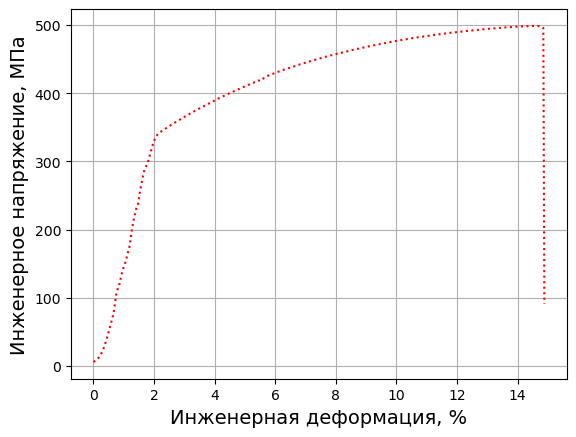

In [3]:
#Расчет инженерного напряжения
# Для расчета инженерного напряжения потребуется площадб сечения
S = round(np.pi* d0**2, 2)
eng = np.array(np.round([(load_stroke_array[:, 1]/L0)*100, load_stroke_array[:, 2]/S], 4))
#Операция eng = eng.T выполняет транспонирование массива.
eng = eng.T
#Построение диаграммы деформации
plt.figure(2)
plt.plot (eng[:, 0], eng[:, 1], ':', color = 'red')
plt.xlabel ('Инженерная деформация, %', fontsize = 14)
plt.ylabel ('Инженерное напряжение, МПа', fontsize = 14)
plt.grid()

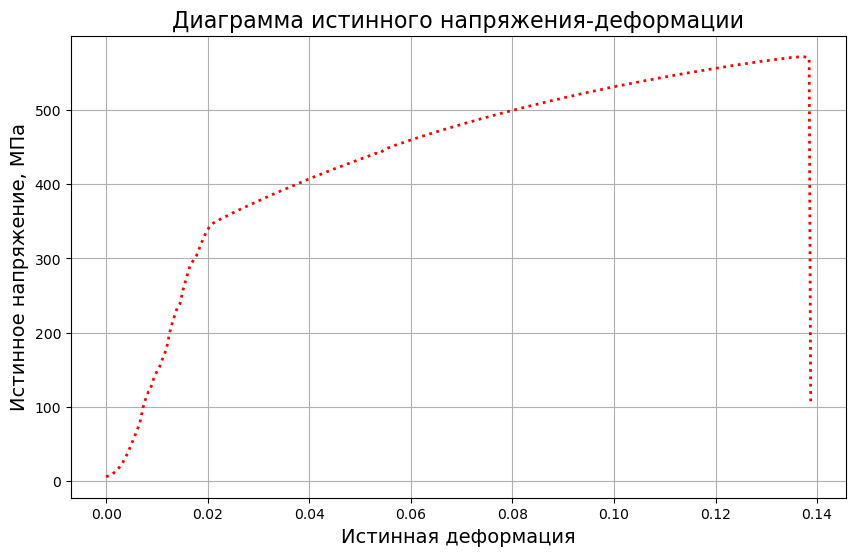

In [4]:

# Расчет истинного напряжения и деформации
#sigma_true = [] # пустой список куда будем записывать значения истинного напряжения
#epsilon_true = [] # пустой список куда будем записывать значения истинной деформации
#for i in range (0, len(eng)):
  #  sigma_true.append(eng[i]*(1+eng[i]/100))
 #   epsilon_true.append(np.log(1+eng[i]/100))
# Визуализируем результаты
# создаем "базу" для график
#plt.plot (epsilon_true, sigma_true, '-', color = 'black')
# Добавляем названия осей
#plt.xlabel ('Истинная деформация', fontsize = 14)
#plt.ylabel ('Истинное напряжение, МПа', fontsize = 14)
# добавляем для красоты сетку
#plt.grid()

# Расчет истинного напряжения и деформации
sigma_true = []  # истинное напряжение
epsilon_true = []  # истинная деформация

for i in range(len(eng)):
    # eng[i, 0] - инженерная деформация (%)
    # eng[i, 1] - инженерное напряжение (МПа)
    
    epsilon_eng = eng[i, 0] / 100  # переводим % в доли единицы
    sigma_eng = eng[i, 1]          # инженерное напряжение
    
    # Правильные формулы:
    epsilon_true.append(np.log(1 + epsilon_eng))        # истинная деформация
    sigma_true.append(sigma_eng * (1 + epsilon_eng))    # истинное напряжение

# Преобразуем в numpy массивы для удобства
epsilon_true = np.array(epsilon_true)
sigma_true = np.array(sigma_true)

# Визуализируем результаты
plt.figure(figsize=(10, 6))
plt.plot(epsilon_true, sigma_true, ':', color='red', linewidth=2)
plt.xlabel('Истинная деформация', fontsize=14)
plt.ylabel('Истинное напряжение, МПа', fontsize=14)
plt.title('Диаграмма истинного напряжения-деформации', fontsize=16)
plt.grid(True)
plt.show()


In [5]:
# Создаем массивы для сохранения
eng_txt = np.column_stack((load_stroke_array[:, 0], eng))
true_txt = np.column_stack((load_stroke_array[:, 0], epsilon_true, sigma_true))

# Сохраняем файлы напрямую в существующую папку
np.savetxt('C:/Jupiter/HM1_result/eng_strain_and_stress.txt', eng_txt, 
           delimiter='\t', fmt='%.4f', 
           header='Время\tИнженерная_деформация_%\tИнженерное_напряжение_МПа')

np.savetxt('C:/Jupiter/HM1_result/true_strain_and_stress.txt', true_txt, 
           delimiter='\t', fmt='%.4f', 
           header='Время\tИстинная_деформация\tИстинное_напряжение_МПа')

print("Файлы успешно сохранены в C:/Jupiter/HM1_result/")

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Jupiter/HM1_result/eng_strain_and_stress.txt'